# Simple 2 Moving Average Model

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta
from sharpe import gen_sharpe
from gen_ma_cross_table import gen_ma_cross_table
from gen_ma_cross_visual import gen_ma_cross_visual
from gen_buyhold_comp import gen_buyhold_comp

Downloading Data:

In [2]:
#all inputs
ticker = "QQQ"
#YYYY-MM-DD
start = "2010-04-25"
#moving Averages, MA1 is typically smaller than MA2
ma1 = "50"
ma2 = "250"

#model trading days input in days, standard 1Y is 252 days. Can use multiples of 252 to track years
model_days = 252 * 5


#fixed end date of today - 1 day
end = str(date.today() - timedelta(1))

#multi_level_index = False removes ticker noise in table
df = yf.download(ticker, start, end, multi_level_index = False)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Complete Table Creation

In [3]:
gen_ma_cross_table(df, ma1, ma2)

,Day Count,Open,High,Low,Close,50-day MA,250-day MA,Daily Return,Cumulative Return,Model Return,Cumulative Model Return,Signal,Entry
Date,,,,,,,,,,,,,
2011-04-20,251,50.775,51.074,50.713,51.022,50.197,44.772,2.236,2.262,2.236,2.262,1,1.0
2011-04-21,252,51.515,51.542,51.268,51.427,50.196,44.800,0.792,3.074,0.792,3.074,1,0.0
2011-04-25,253,51.471,51.586,51.374,51.559,50.204,44.833,0.257,3.339,0.257,3.339,1,0.0
2011-04-26,254,51.691,52.035,51.577,51.850,50.214,44.867,0.563,3.922,0.563,3.922,1,0.0
2011-04-27,255,51.947,52.264,51.709,52.203,50.222,44.899,0.678,4.629,0.678,4.629,1,0.0


# MA Cross-Over Grid Visualization

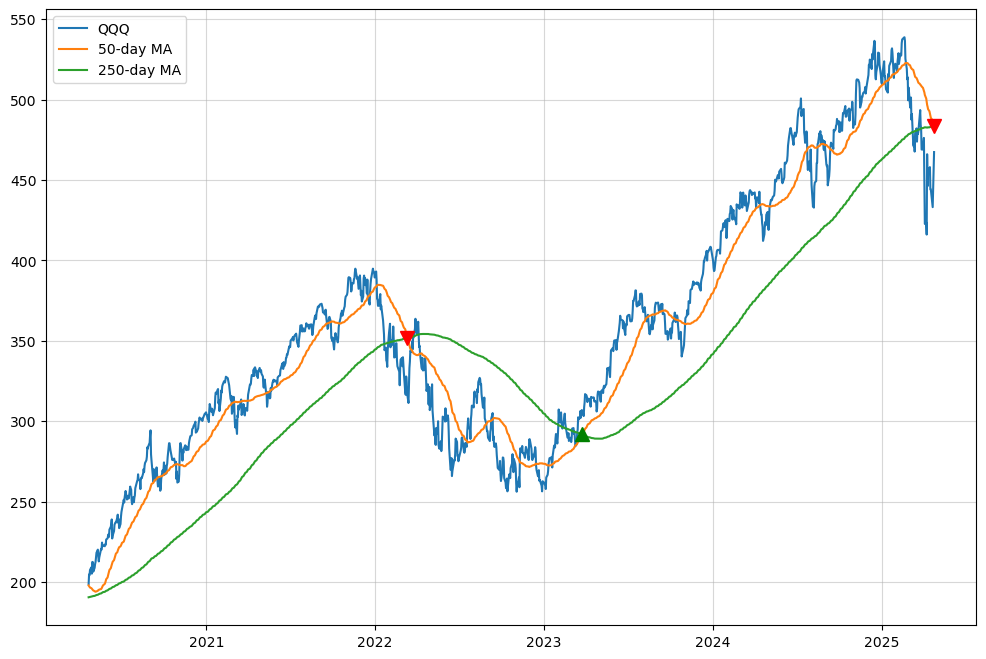

In [4]:
gen_ma_cross_visual(df, ma1, ma2, model_days, ticker)

# Buy/Hold to SMA Returns Comparison

Cumulative Buy/Hold Return: 661.0
Cumulative Model Return: 387.49


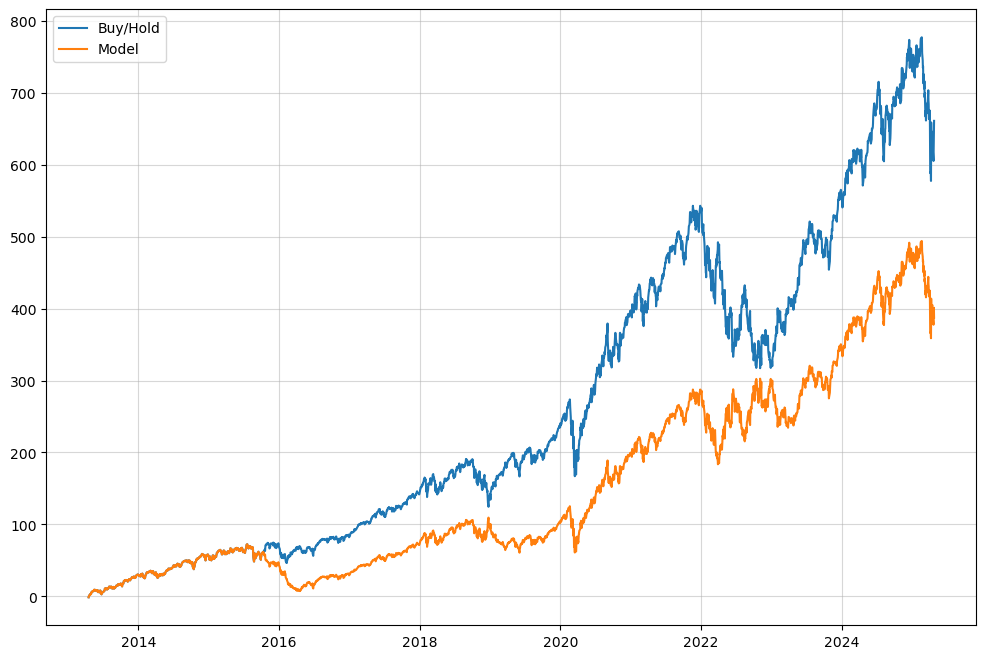

In [5]:
gen_buyhold_comp(df, ma1, ma2)

# Sharpe Ratio:

In [6]:
print('Buy/Hold Sharpe Ratio:', round(gen_sharpe(df['Daily Return']), 2))
print('Model Sharpe Ratio:', round(gen_sharpe(df['Model Return']), 2))

Buy/Hold Sharpe Ratio: 0.79
Model Sharpe Ratio: 0.62
